## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Lucia
- Apellido: Ugalde
- Legajo: 1594382

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
#Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
#importamos el dataset

Dataset='C:/Users/lugalde/Documents/Untitled Folder 1/TPS/ClusterAI_TP_dataset_diabetes.csv'
df=pd.read_csv(Dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
shape=df.shape

In [4]:
#imprimimos la informacion requerida, buscando las ubicaciones de la tuple shape

print('El dataset tiene',shape[0],'filas y',shape[1],'columnas')

El dataset tiene 768 filas y 9 columnas


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

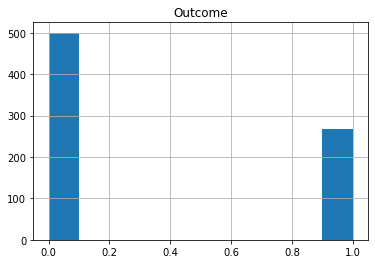

In [6]:
#realizamos un histograma, para visualizar las frecuencias. Y con value_counts vemos la proporcion de cada valor (0 , 1) 

df.hist('Outcome') 
df['Outcome'].value_counts(normalize=True,dropna=False)

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [7]:
# media, max, min, desvio estandar
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

In [8]:
#Buscamos el valor de las columnas
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

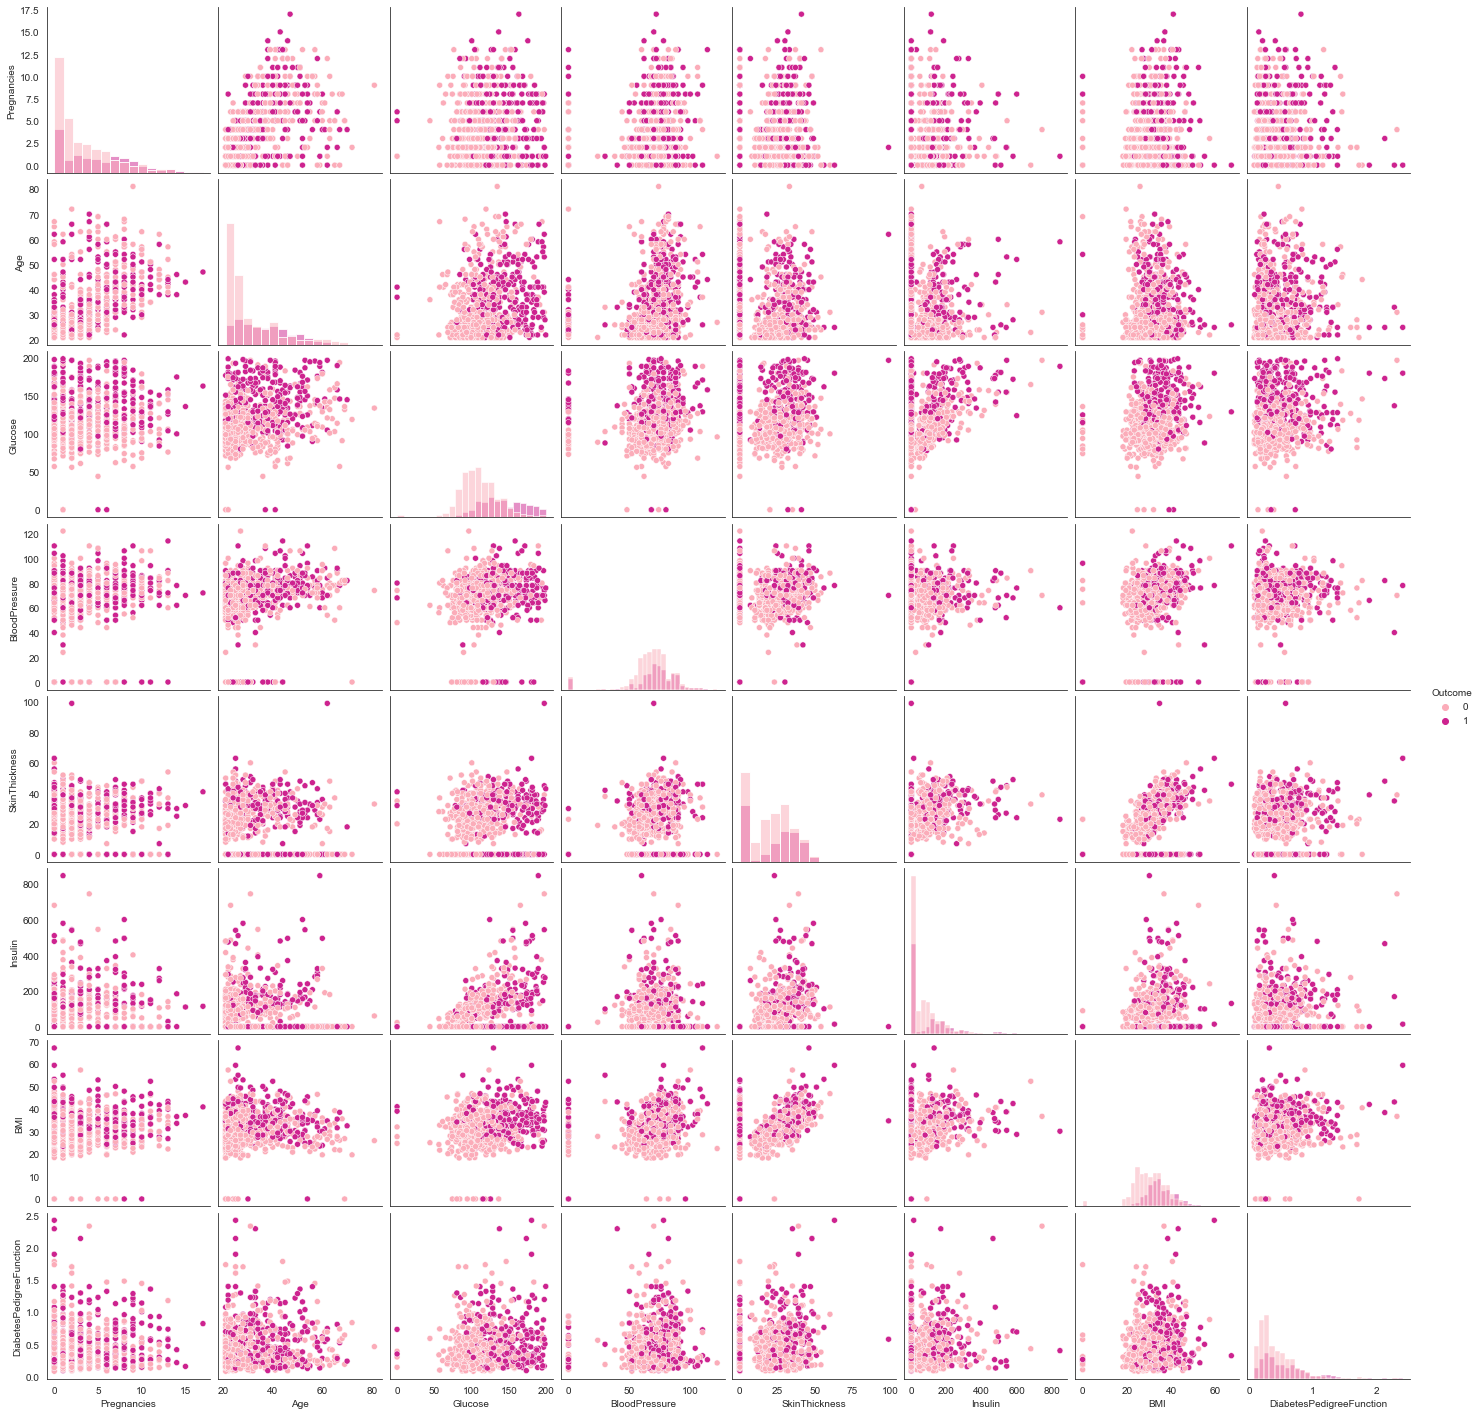

In [9]:
#Armamos un pairplot con cada feature del dataset, menos de Outcome. Que la va a diferenciar en cada gráfico.

sns.set_style('white')
vars=["Pregnancies", "Age",'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

pairplot = sns.pairplot(df, hue = 'Outcome', diag_kind = 'hist', palette = 'RdPu',  vars = vars)

Una rapida conclusion que podemos sacar es que alta glucosa tiene una fuerte correlación con tener diabetes 

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos paresde variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

In [10]:
#Guardamos las columnas como una Dataframe en a

a= df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]


<AxesSubplot:>

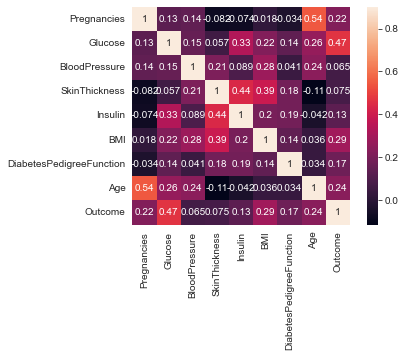

In [25]:
#Con el metodo corr aplicamos el método .corr() para calcular la correlacion lineal entre todas las variables
#Armamos el heatmap, con annot le coloca el valor de correlación lineal en el gráfico
corrmat = a.corr()
sns.heatmap(corrmat, vmax=.9, square=True,annot=True)

El primer par de variables con mayor correlación son la edad y la cantidad de embarazos, que no tiene interés para este estudio, con un valor de 0.54
La segunda es tener diabetes y tener alta glucosa, 0,47. Ambas con relación lineal. 

-Segun el dataset, tener alta glucosa es un fuerte indicador de tener diabetes.


##### **Objetivo 8**
Hacer un histograma de la variable BMI

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

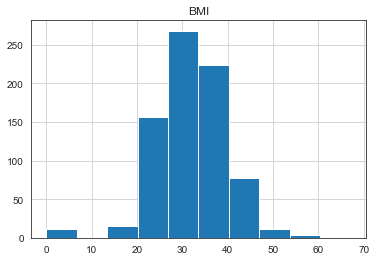

In [12]:
#Usamos el método .hist para hacer un histograma de la columna BMI
df.hist('BMI') 

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

<AxesSubplot:>

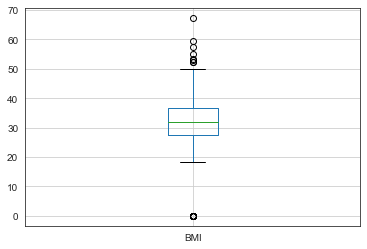

In [13]:
#Con el método .boxplot hacemos el boxplot de la variable.
df.boxplot('BMI') 

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [14]:
#Guardamos solo los valores de la columna BMI que sean distintos a 0. Se eliminan todas las filas con el valor 0.
df = df[df['BMI'] != 0]

In [15]:
#Guardamos solo los valores de la columna BMI que sean menores a 50.
df = df[df['BMI'] < 50 ]

<AxesSubplot:>

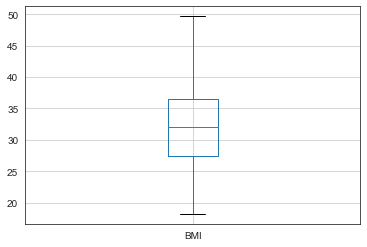

In [16]:
#Repetimos el boxplot con los valores que permanecen (sin outliers)
df.boxplot('BMI') 

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

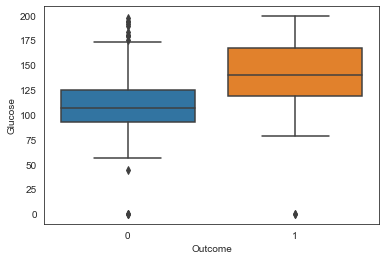

In [17]:
#Hacemos un boxplot de los valores de glucosa, con cada valor de Outcome en el eje x, no diabetico / diabetico.
sns.boxplot(data=df,x="Outcome", y="Glucose") 

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

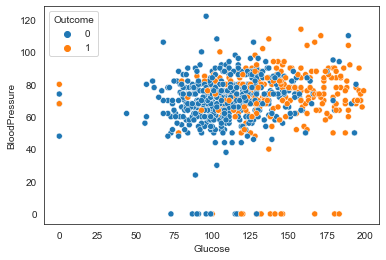

In [18]:
#Armamos un scatterplot que muestra x: Glucosa y: Presión sanguinea, que diferencia a los pacientes diabeticos 
#con los que no lo son en la leyenda del grafico. 

sns.scatterplot(data=df, x='Glucose', y='BloodPressure', hue='Outcome')

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [19]:
#Construimos el primer rango de edad con un for, que arma una matriz con primer columna edad (int), 
# segunda columna se le asigna el string: '0-30 años'
rango1 = []
for i in range(30):
    rango1.append([i+1])
    for j in range(1):
        rango1[i].append('0-30 años')

#lo repetimos con los dos rangos restantes.
        
rango2=  []
for i in range(11):
    rango2.append([30+i])
    for j in range(1):
        rango2[i].append('de 30 a 40 años')
rango2

rango3=  []
for i in range(500):
    rango3.append([40+i])
    for j in range(1):
        rango3[i].append('mayor de 40')

#Las convertimos en Dataframe

rango1=pd. DataFrame(rango1)
rango2=pd. DataFrame(rango2)
rango3=pd. DataFrame(rango3)

#Concatenamos los rangos y le cambiamos el nombre a las columnas a Age y a Rango etario, para poder combinarla con el
#dataset inicial

rangoedad=pd.concat([rango1,rango2,rango3], ignore_index=True)
rangoedad.columns = ['Age', 'Rango etario']
rangoedad

,Age,Rango etario
0,1,0-30 años
1,2,0-30 años
2,3,0-30 años
3,4,0-30 años
4,5,0-30 años
...,...,...
536,535,mayor de 40
537,536,mayor de 40
538,537,mayor de 40
539,538,mayor de 40


In [20]:
#Combinamos el dataset Df con el de rango de edades, solo nos quedamos con el valores que tienen en comun ambas dataframes (inner) 
#lo guardamos en Df 
Df=pd.merge(rangoedad, df, on=["Age"],how='inner')


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

<AxesSubplot:xlabel='Rango etario', ylabel='count'>

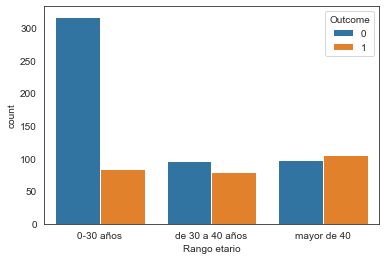

In [21]:
#Aplicamos el método .countplot a Df, como eje x a los distintos rangos etarios y con hue diferenciamos a los diabeticos y no diabeticos.
sns.countplot(data=Df,x="Rango etario", hue="Outcome")

La conclusión que extraemos es que a medida que aumenta la edad aumenta el riesgo de tener diabetes.